In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data from the CSV file
file_path = 'Data\struct4.csv'
data = pd.read_csv(file_path)

In [3]:
# Separate the data into 'dbpedia' and 'wiki' datasets
dbpedia_data = data[data['File'].str.contains('dbpedia')].drop(columns= ['Unnamed: 0'])
wiki_data = data[data['File'].str.contains('wiki')].drop(columns= ['Unnamed: 0'])

In [4]:
wiki_data

Unnamed: 0.1                              File  Version       Density  CC  \
12            12  http://example.com/wiki_20140526        0  5.253490e-08   0   
13            13  http://example.com/wiki_20140804        1  4.272530e-08   0   
14            14  http://example.com/wiki_20141110        2  4.026410e-08   0   
15            15  http://example.com/wiki_20150223        3  3.661930e-08   0   
16            16  http://example.com/wiki_20150601        4  3.312960e-08   0   
17            17  http://example.com/wiki_20150817        5  3.034790e-08   0   
18            18  http://example.com/wiki_20151012        6  2.880030e-08   0   
19            19  http://example.com/wiki_20151228        7  3.922480e-08   0   
20            20  http://example.com/wiki_20160328        8  2.565190e-08   0   
21            21  http://example.com/wiki_20160621        9  2.361300e-08   0   
22            22  http://example.com/wiki_20160801       10  2.273510e-08   0   

         KD    VocUni      Vdyn   AddVdyn   RemVdyn  ChangeRatio     AddCR  \
12  2.19131  0.458562  0.000000  0.000000  0.000000     0.000000  0.000000   
13  2.37421  0.448906  0.157652  0.142548  0.015104     0.283052  0.261225   
14  2.56068  0.434743  0.139196  0.107383  0.031813     0.256290  0.211778   
15  2.70159  0.425291  0.209715  0.130400  0.079314     0.333496  0.263718   
16  2.82759  0.423513  0.091360  0.086087  0.005273     0.101548  0.101178   
17  2.82579  0.426198  0.074421  0.070944  0.003477     0.106787  0.090064   
18  3.23276  0.424684  0.080762  0.059041  0.021721     0.072117  0.060254   
19  2.73739  0.434970  0.332229  0.046792  0.285437     0.380801  0.059841   
20  3.76407  0.398193  0.397697  0.352009  0.045688     0.433972  0.661779   
21  3.89862  0.395381  0.070622  0.065329  0.005293     0.091866  0.086214   
22  4.21189  0.394805  0.041925  0.039854  0.002070     0.047502  0.044926   

       RemCR   Growth  
12  0.000000  0.00000  
13  0.090068  1.17116  
14  0.093174  1.11860  
15  0.148740  1.11498  
16  0.008331  1.09285  
17  0.023699  1.06636  
18  0.014404  1.04585  
19  0.333752  0.72609  
20  0.038909  1.62287  
21  0.010563  1.07565  
22  0.003160  1.04177

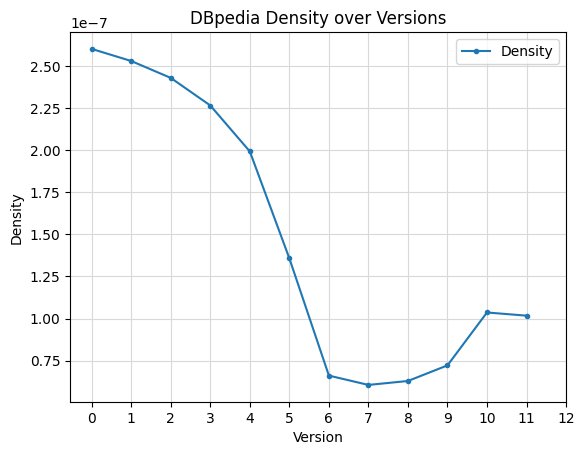

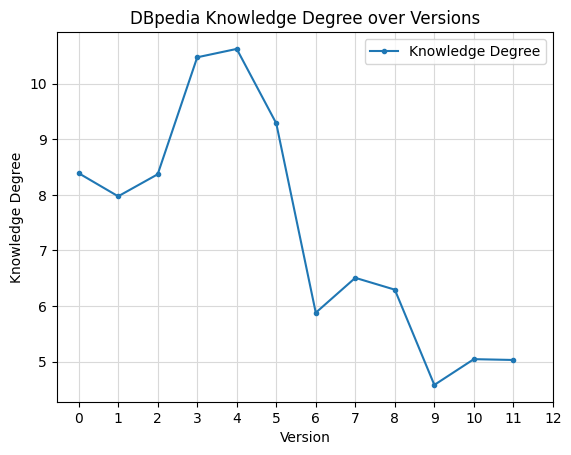

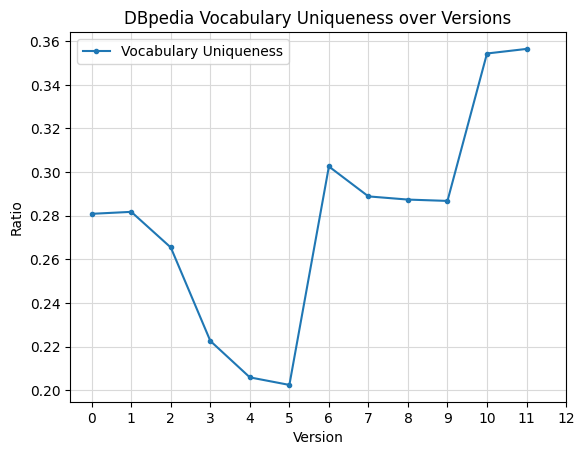

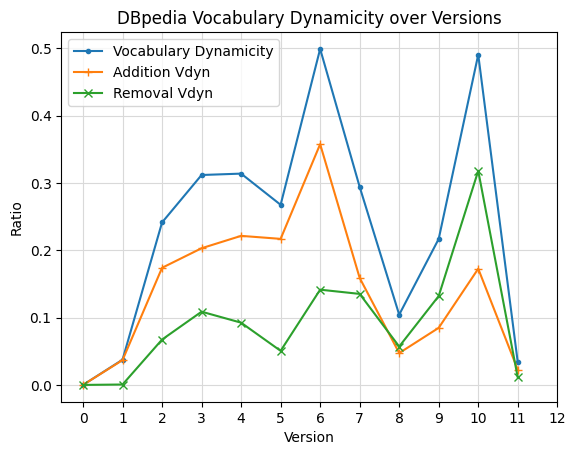

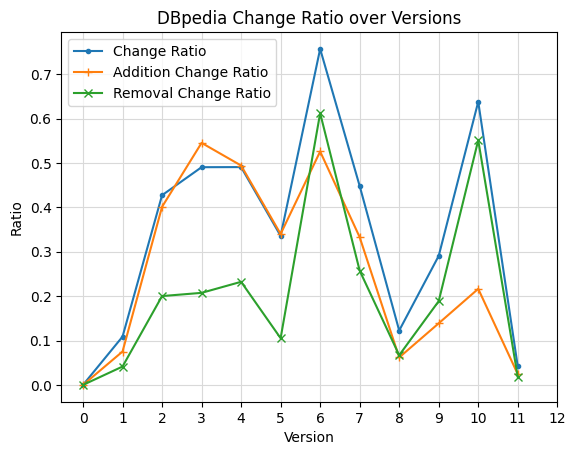

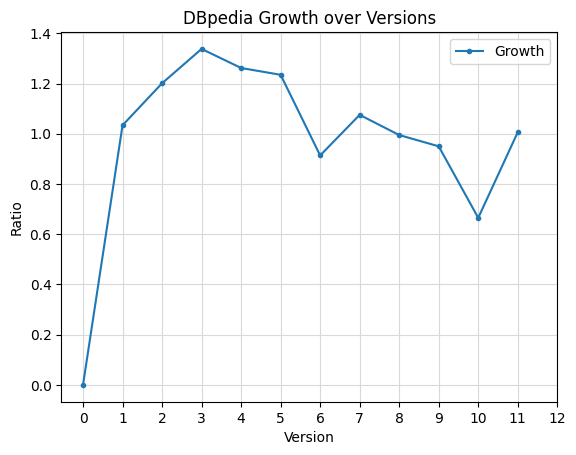

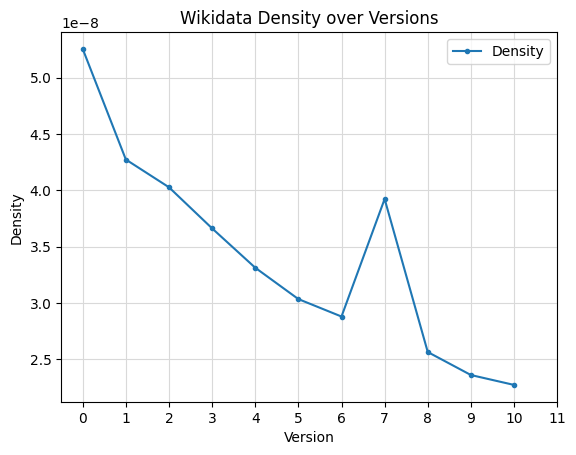

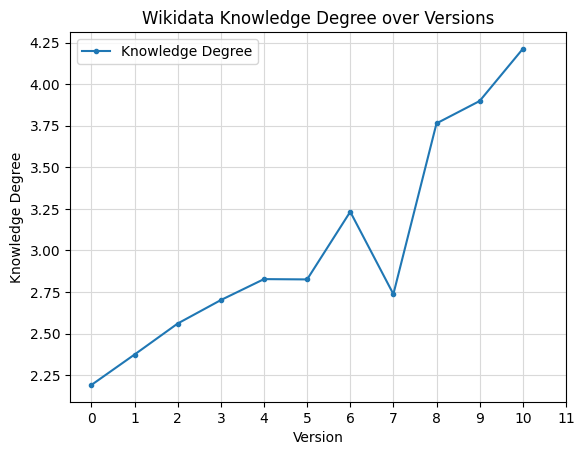

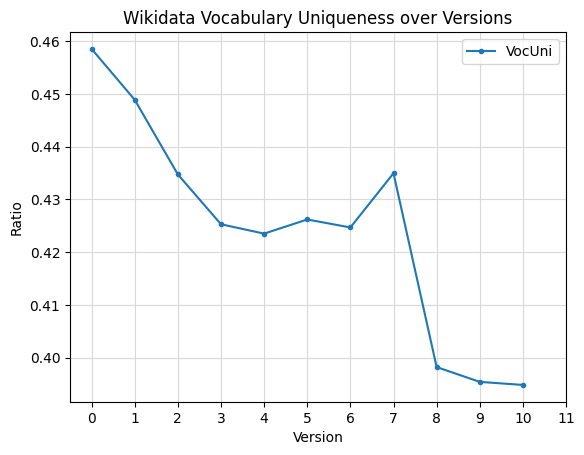

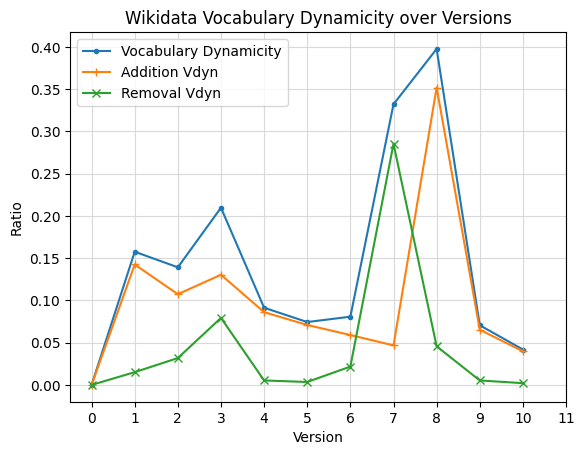

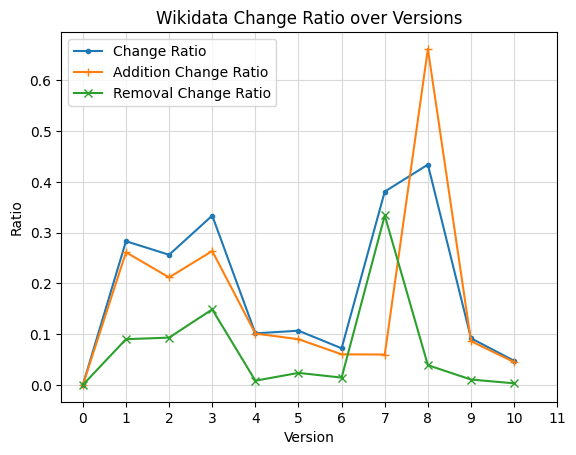

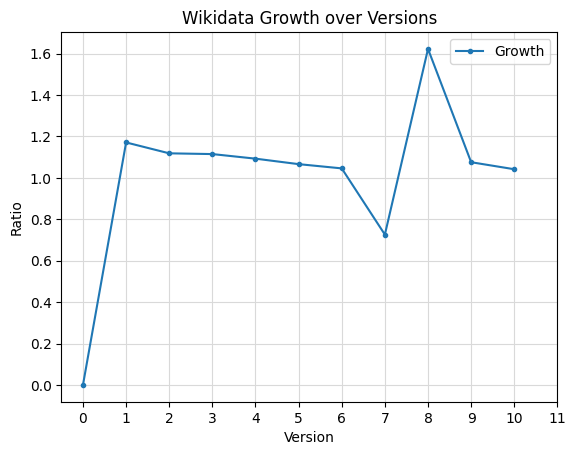

In [9]:
def plot_parameters_over_versions(df, parameters, markers, title, output_file_name, legend_mapping=None, x_label='Ratio'):
    for parameter, marker in zip(parameters, markers):
        legend_name = legend_mapping[parameter] if legend_mapping is not None else parameter
        plt.plot(df['Version'], df[parameter], marker=marker, linestyle='-', label=legend_name)

    plt.xlabel('Version')
    plt.ylabel(x_label)
    plt.title(title)
    plt.legend()
    plt.grid(axis='both', color='0.85')
    plt.xticks(np.arange(0, len(df[parameter])+1, 1))
    plt.savefig(f'plots/{output_file_name}', dpi=300, bbox_inches='tight')
    plt.show()

legend_mapping = {'KD': 'Knowledge Degree', 'VocUni': 'Vocabulary Uniqueness', 'Vdyn': 'Vocabulary Dynamicity', 'AddVdyn': 'Addition Vdyn', 'RemVdyn': 'Removal Vdyn', 'ChangeRatio': 'Change Ratio', 'AddCR': 'Addition Change Ratio', 'RemCR': 'Removal Change Ratio', 'Growth': 'Growth'}


# Plot parameters for the 'dbpedia' dataset
plot_parameters_over_versions(dbpedia_data, ['Density'], ['.'], "DBpedia Density over Versions", 'dbpedia_Density.png', x_label='Density')
plot_parameters_over_versions(dbpedia_data, ['KD'], ['.'], "DBpedia Knowledge Degree over Versions", 'dbpedia_KD.png', legend_mapping=legend_mapping, x_label='Knowledge Degree')
plot_parameters_over_versions(dbpedia_data, ['VocUni'], ['.'], "DBpedia Vocabulary Uniqueness over Versions", 'dbpedia_VocUni.png', legend_mapping=legend_mapping)
plot_parameters_over_versions(dbpedia_data, ['Vdyn', 'AddVdyn', 'RemVdyn'], ['.', '+', 'x'], "DBpedia Vocabulary Dynamicity over Versions", 'dbpedia_Vdyn.png', legend_mapping=legend_mapping)
plot_parameters_over_versions(dbpedia_data, ['ChangeRatio', 'AddCR', 'RemCR'], ['.', '+', 'x'], "DBpedia Change Ratio over Versions", 'dbpedia_ChangeRatio.png', legend_mapping=legend_mapping)
plot_parameters_over_versions(dbpedia_data, ['Growth'], ['.'],"DBpedia Growth over Versions", 'dbpedia_Growth.png', legend_mapping=legend_mapping)

# Plot parameters for the 'wiki' dataset
plot_parameters_over_versions(wiki_data, ['Density'], ['.'], "Wikidata Density over Versions", 'wiki_Density.png', x_label='Density')
plot_parameters_over_versions(wiki_data, ['KD'], ['.'], "Wikidata Knowledge Degree over Versions", 'wiki_KD.png', legend_mapping=legend_mapping, x_label='Knowledge Degree')
plot_parameters_over_versions(wiki_data, ['VocUni'], ['.'], "Wikidata Vocabulary Uniqueness over Versions", 'wiki_VocUni.png')
plot_parameters_over_versions(wiki_data, ['Vdyn', 'AddVdyn', 'RemVdyn'], ['.', '+', 'x'],"Wikidata Vocabulary Dynamicity over Versions", 'wiki_Vdyn.png', legend_mapping=legend_mapping)
plot_parameters_over_versions(wiki_data, ['ChangeRatio', 'AddCR', 'RemCR'], ['.', '+', 'x'],"Wikidata Change Ratio over Versions", 'wiki_ChangeRatio.png', legend_mapping=legend_mapping)
plot_parameters_over_versions(wiki_data, ['Growth'], ['.'],"Wikidata Growth over Versions", 'wiki_Growth.png', legend_mapping=legend_mapping)